In [1]:
# Importando os módulos:
import pandas as pd
import folium
from folium import plugins, Map
import matplotlib.pyplot as plt
import collections
import datetime
import numpy as np

In [2]:
# Leitura do arquivo base
df = pd.read_csv(r"dataset_v01.csv", delimiter=",")
df.head()

id              dat_nsc  \
0  d6c0cc1d-eb61-486a-b5c3-50725ef44d61  1981-01-30 00:00:00   
1  da0067e7-aa6b-4355-b373-ca17f6ac3b44  1978-01-28 00:00:00   
2  2d729b8a-d53c-48e7-8bf5-33b021980c04  1954-12-09 00:00:00   
3  62c0f1e6-36f2-4205-a134-232a58a6f8a5  1975-08-28 00:00:00   
4  0cef9719-0aa3-49a2-adea-9c09c04de071  1957-06-17 00:00:00   

                          renda          latitude         longitude  
0  DE R$ 1.900,00 A R$ 3.800,00  -04,847580000004  -37,784390000004  
1  DE R$ 3.800,00 A R$ 7.600,00  -26,990118139539  -48,637165232562  
2  DE R$ 3.800,00 A R$ 7.600,00  -05,053671016443  -42,813152032883  
3    DE R$ 788,00 A R$ 1.140,00  -15,059042000004  -48,163372000004  
4    DE R$ 788,00 A R$ 1.140,00  -17,694658000004  -42,522280000004

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10000 non-null  object
 1   dat_nsc    9936 non-null   object
 2   renda      10000 non-null  object
 3   latitude   8743 non-null   object
 4   longitude  8743 non-null   object
dtypes: object(5)
memory usage: 390.8+ KB


In [4]:
# Tratando formatação das coordenadas, trocado as virgulas por ponto e removendo registros sem coordenadas
df['latitude'] = df['latitude'].str.replace(',','.')
df['longitude'] = df['longitude'].str.replace(',','.')
df.dropna(subset=['latitude'], inplace=True)

In [12]:
# Agora podemos trabalhar com as coordenadas sem problemas!
df.head()

id              dat_nsc  \
0  d6c0cc1d-eb61-486a-b5c3-50725ef44d61  1981-01-30 00:00:00   
1  da0067e7-aa6b-4355-b373-ca17f6ac3b44  1978-01-28 00:00:00   
2  2d729b8a-d53c-48e7-8bf5-33b021980c04  1954-12-09 00:00:00   
3  62c0f1e6-36f2-4205-a134-232a58a6f8a5  1975-08-28 00:00:00   
4  0cef9719-0aa3-49a2-adea-9c09c04de071  1957-06-17 00:00:00   

                          renda          latitude         longitude  
0  DE R$ 1.900,00 A R$ 3.800,00  -04.847580000004  -37.784390000004  
1  DE R$ 3.800,00 A R$ 7.600,00  -26.990118139539  -48.637165232562  
2  DE R$ 3.800,00 A R$ 7.600,00  -05.053671016443  -42.813152032883  
3    DE R$ 788,00 A R$ 1.140,00  -15.059042000004  -48.163372000004  
4    DE R$ 788,00 A R$ 1.140,00  -17.694658000004  -42.522280000004

In [5]:
# Separando os dados por Renda
renda_1 = df.query('renda == "DE R$ 788,00 A R$ 1.140,00"')
renda_2 = df.query('renda == "DE R$ 1.900,00 A R$ 3.800,00"')
renda_3 = df.query('renda == "DE R$ 3.800,00 A R$ 7.600,00"')
renda_4 = df.query('renda == "MAIOR QUE R$ 7.600,00"')

In [6]:
# Adequando os dados das coordenadas, armazenando em uma lista
coordenadas = list()
for lat,lng in zip(df.latitude.values[:],df.longitude.values[:]):
    coordenadas.append([lat,lng])

In [7]:
mapa = folium.Map(location=[lat,lng],zoom_start=5,tiles='Stamen Toner')

In [8]:
# Exibição do mapa de calor com as coordenadas do conjunto de dados disponibilizado
mapa.add_child(plugins.HeatMap(coordenadas))

In [9]:
# Salvando arquivo html da amostragem do mapa de calor
mapa.save('mapa-consumidor.html')

In [10]:
# Números de registros por RENDA
df['renda'].value_counts()

DE R$ 1.900,00 A R$ 3.800,00    4177
DE R$ 788,00 A R$ 1.140,00      2757
DE R$ 3.800,00 A R$ 7.600,00    1737
MAIOR QUE R$ 7.600,00             72
Name: renda, dtype: int64

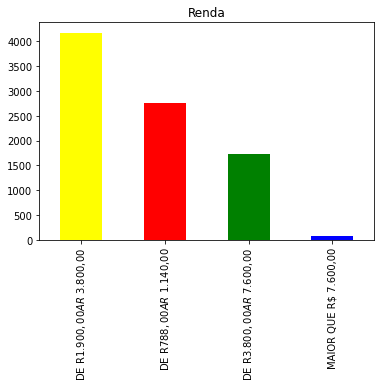

In [11]:
df['renda'].value_counts().plot(kind='bar',title='Renda', color=['yellow', 'red', 'green', 'blue']);